In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('crime_data.csv')

# `Renaming and Dropping Columns`

In [3]:
df.rename({'Unnamed: 0':'State'},axis=1,inplace=True)

In [4]:
df1=df.drop('State',axis=1)

# `Visualizations`

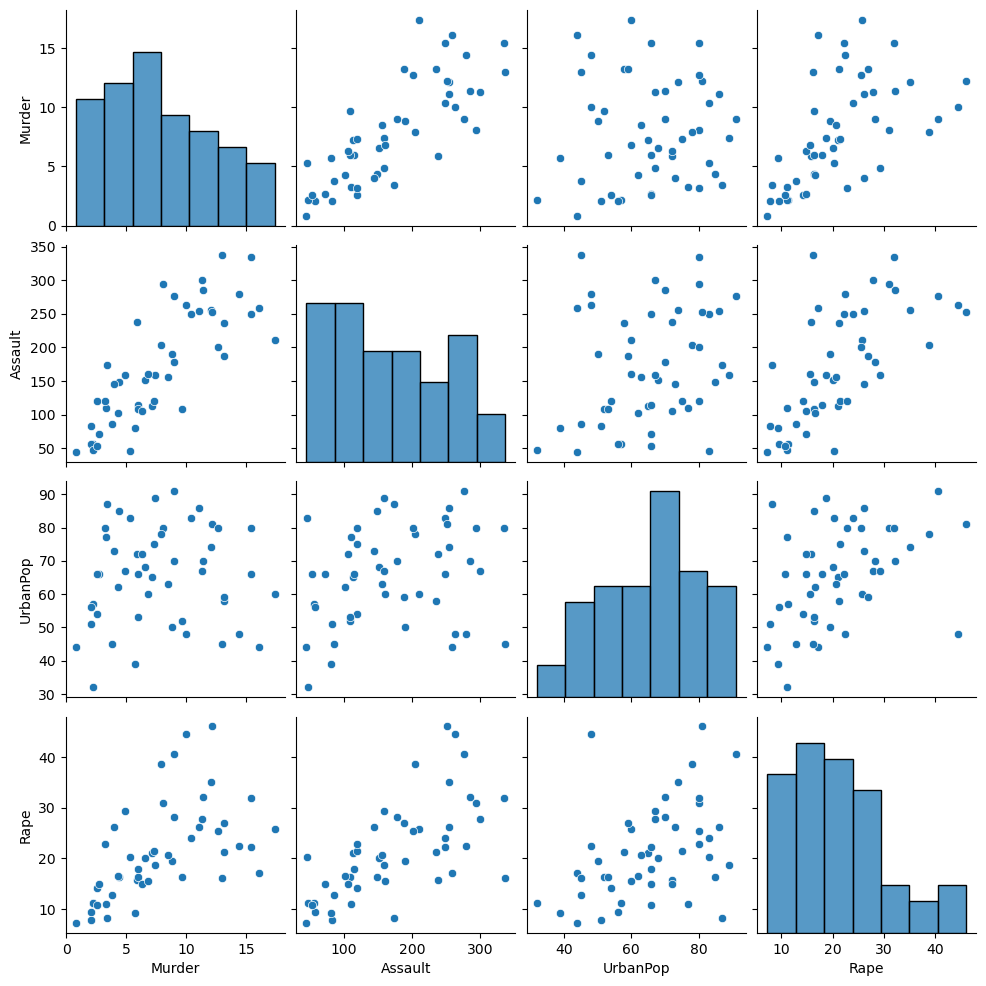

In [14]:
sns.pairplot(data=df1)

<Axes: >

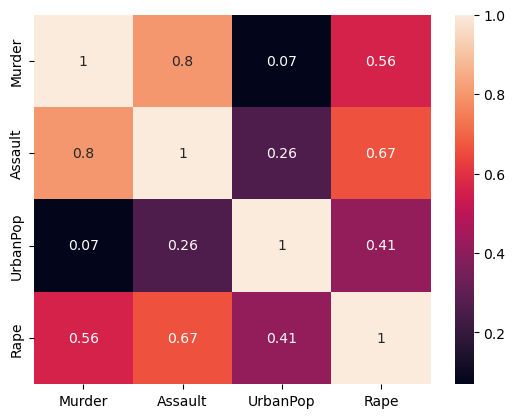

In [18]:
sns.heatmap(data=df1.corr(),annot=True)

In [16]:
df1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# `Applying MinMaxScaler`

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler=MinMaxScaler()

In [7]:
scaled_df=scaler.fit_transform(df1)

# `Using DBSCAN`

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
dbscan=DBSCAN(eps=0.4,min_samples=16)

In [10]:
dbscan.fit(scaled_df)

DBSCAN(eps=0.4, min_samples=16)

In [11]:
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
silhouette_score(scaled_df,dbscan.fit_predict(scaled_df))

0.3472780651939229